#Unveiling Olympic Trends: Analyzing Performance, Gender Equity, and Future Projections in Summer Games (1896–2024)








# Executive Summary

The Olympics dataset, spanning 1896 to 2024, contains over 250,000 records and provides a comprehensive view of performance trends, medal distributions, and participation patterns in the Summer Olympics. This project explores several key aspects, including identifying the top 10 medal-winning countries, analyzing the most popular events, evaluating country specialization in specific sports, and predicting the future performance of the U.S. Women’s Gymnastics team. It also examines gender disparities in participation and medal distribution, as well as the impact of hosting on a country’s performance.

The dataset, sourced from Kaggle, features 11 attributes such as athlete names, genders, countries, events, and medals, with no missing values. Through methods like grouping, regression, clustering, and time series analysis, the project derives actionable insights. The United States emerged as the most dominant nation in total medals, particularly in athletics, while countries like Kenya and Jamaica excel in long-distance running and sprinting, respectively. Gender analysis revealed an encouraging trend toward greater participation and success for female athletes over time.

Key findings include the most popular Olympic events, such as athletics and swimming, the significant advantage for host countries in medal counts, and the sustained excellence of the U.S. Women’s Gymnastics team based on historical trends. This project highlights the potential of sports analytics in uncovering historical dominance, understanding gender equity, and predicting future performance trends, offering valuable insights into the evolution of the Olympic Games.

# Introduction

The Summer Olympics, one of the world’s most celebrated sporting events, has been held every four years since 1896, bringing together athletes from diverse nations to compete across a variety of disciplines. The event is not only a showcase of athletic excellence but also a reflection of historical, social, and geopolitical trends. This project examines the rich history of the Summer Olympics through a dataset of over 250,000 records.

The problem domain centers on understanding the dynamics of performance, participation, and medal distribution across countries and genders. Historically, certain nations like the United States and the Soviet Union have dominated the medal counts, raising questions about the factors contributing to such dominance. Additionally, gender disparities in both participation and medal achievement have evolved significantly over time, reflecting broader societal changes. Another key area of interest is the impact of hosting the Olympics, as countries often experience a measurable advantage in medal counts during home games. Finally, the project explores future performance predictions, with a focus on the U.S. Women’s Gymnastics team, a consistently high-performing unit in recent history.

With 234 countries, 76 sports, and over 1,000 unique events represented in the dataset, this analysis aims to uncover patterns of dominance, trends in gender equity, and the factors influencing success. These insights provide a deeper understanding of the Olympics as both a global competition and a window into societal progress.

**Research Questions**
1. What are the top 10 countries by medal count?
2. What are the most popular events at Olympics, Globally and Countrywise?
3. Which countries perform the best in top 10 most popular sports in Olympics
4. Gender disparity and participation
5. Does being host country have an advantage in Olympics?
6. How is the Historical Performance of US Women's Gymanstics team in the Olympics?
7. What predictive model would be ideal for predicting Medal wins in the Olympics?

**Limitations of the Study**
-Overrepresentation of certain countries, particularly the USA, which could bias comparative analyses.

-Presence of a large volume of 'No medal' entries requiring careful data management to focus analysis on medalists.

-Changes in sports categories and events over the decades pose challenges for longitudinal analysis.

-The presence of over 1,041 unique events requires sophisticated aggregation methods for meaningful analysis.



# Data Overview

The dataset contains 252,565 entries with no missing values across 11 columns. Key attributes include athlete name, gender, country, year, sport, event, and medal status. The dataset covers 234 countries and spans 128 years of Olympic history.

In [ ]:
import pandas as pd
olympics = pd.read_csv('/content/olympics_dataset.csv')
olympics.columns


Index(['player_id', 'Name', 'Sex', 'Team', 'NOC', 'Year', 'Season', 'City',
       'Sport', 'Event', 'Medal'],
      dtype='object')

**Data dictionary:**

player_id: Unique identifier for each athlete.

Name: Name of the athlete.

Sex: Gender of the athlete (Male (M) /Female (F)).

Team: Country the athlete represented.

NOC: National Olympic Committee code for the country.

Year: Year of the Olympic Games.

Season: Season of the Olympic Games (Summer).

City: Host city of the Olympic Games.

Sport: Sport category in which the athlete competed.

Event: Specific event within the sport.

Medal: Type of medal awarded (Gold, Silver, Bronze) or "No medal" if not awarded.

## Data Cleaning & Preparation

The code processes the olympics dataset to prepare the 'Medal' column for analysis. First, any missing (NaN) values in the 'Medal' column are replaced with the string 'No Medal', ensuring no missing entries remain. Next, the medal categories are mapped to numerical values using a predefined dictionary, where 'No Medal' is assigned 0, 'Bronze' is assigned 1, 'Silver' is assigned 2, and 'Gold' is assigned 3. This transformation allows the categorical data to be converted into a numerical format suitable for statistical analysis or machine learning models. Additionally, any residual missing values in the 'Medal' column (if present) are removed from the dataset. Finally, the first five rows of the updated dataset are printed to confirm the successful application of these modifications. These steps ensure the dataset is clean, consistent, and ready for predictive modeling.








In [ ]:
olympics['Medal'] = olympics['Medal'].fillna('No Medal') # Fill NaN values with 'No Medal'
medal_mapping = {'No Medal': 0, 'Bronze': 1, 'Silver': 2, 'Gold': 3}
olympics['Medal'] = olympics['Medal'].map(medal_mapping)

olympics.dropna(subset=['Medal'], inplace=True)

print(olympics.head())

## Key Dataset Visualizations



Here are some of key insights into the evolution of the Summer Olympics dataset presented through visualizations of gender distribution, participation trends, and the geographic distribution of hosting countries.

<Axes: title={'center': 'Gender Distribution'}, xlabel='Gender', ylabel='Count'>

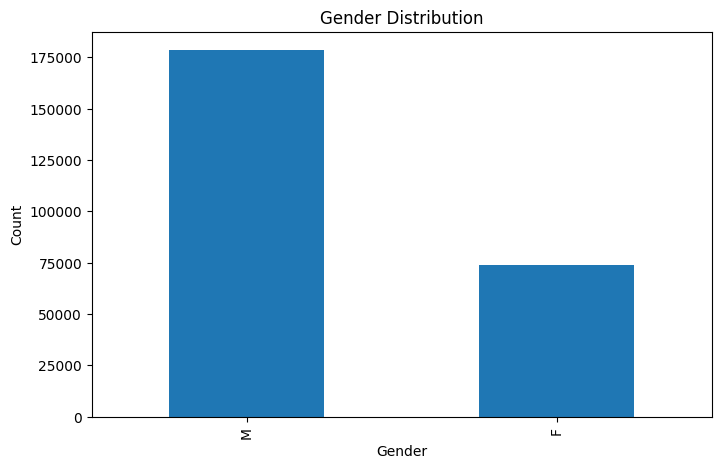

In [ ]:
#Gender Distribution
import matplotlib.pyplot as plt

gender_distribution = olympics['Sex'].value_counts()

plt.figure(figsize=(8, 5))
gender_distribution.plot(kind='bar', title='Gender Distribution', xlabel='Gender', ylabel='Count')

The gender distribution in the dataset reveals a significant imbalance, with male athletes far outnumbering female athletes. Specifically, there are approximately 178,000 male participants compared to about 74,000 female participants. This disparity reflects historical patterns in sports participation, particularly in the earlier years of the Olympics, where societal norms and structural barriers limited opportunities for women. However, this trend also underscores the need for further exploration of how gender representation has evolved over time and its implications for equity in sports.

<Axes: title={'center': 'Participation Trend Over the Years'}, xlabel='Year', ylabel='Number of Athletes'>

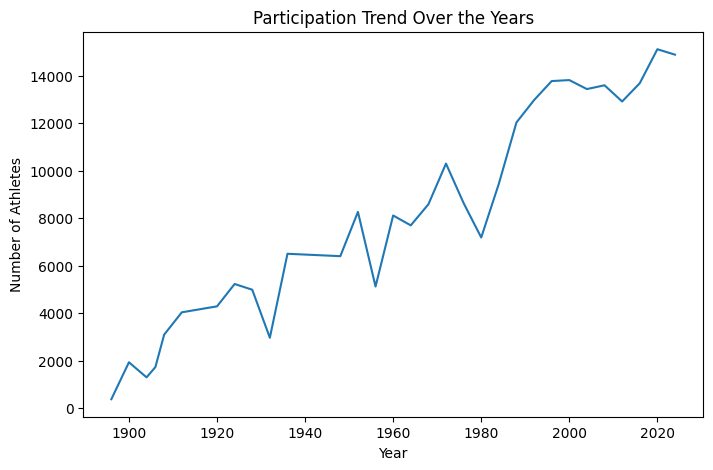

In [ ]:
#Participation Trend over the years
participation_trend = olympics.groupby('Year').size()

plt.figure(figsize=(8, 5))
participation_trend.plot(title='Participation Trend Over the Years', xlabel='Year', ylabel='Number of Athletes')

The participation trend over time shows a steady increase in the number of athletes, particularly from the mid-20th century onward. This growth can be attributed to factors such as the inclusion of more countries, new events, and improved accessibility to the Games. Notable dips in participation could be due to major global events like the World Wars. The sharp rise in athlete numbers after 1950 reflects the globalization of the Olympics and increased inclusivity. This trend highlights the growing importance and reach of the Games as a global sporting event.

# Analysis & Results

## Top 10 Countries by Medal Count


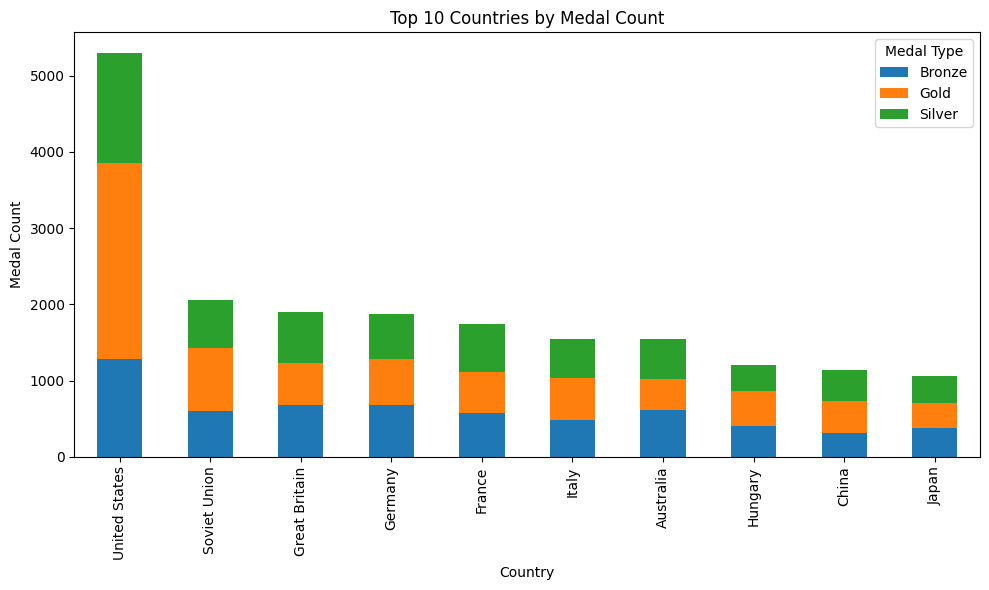

In [ ]:
#Medal Counts by Country
import pandas as pd
import matplotlib.pyplot as plt

medal_data = olympics[olympics['Medal'] != 'No medal']

medal_counts = medal_data.groupby(['Team', 'Medal']).size().unstack(fill_value=0)

medal_counts['Total'] = medal_counts.sum(axis=1)

medal_counts = medal_counts.sort_values(by='Total', ascending=False)

top_countries = medal_counts.head(10)

top_countries.drop(columns='Total').plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Top 10 Countries by Medal Count")
plt.xlabel("Country")
plt.ylabel("Medal Count")
plt.legend(title="Medal Type")
plt.tight_layout()

The United States leads significantly in total medal counts, with a clear margin over other countries. The Soviet Union and Great Britain follow, showcasing strong performances across Olympic events. Other nations like Germany, France, and Italy exhibit consistent medal achievements, emphasizing their long-standing sporting excellence. This distribution highlights the dominance of historically powerful nations in the Olympics, while also pointing to the potential impact of resource allocation, population size, and sports infrastructure in determining success. The stacked bar chart further illustrates the breakdown of medal types (gold, silver, and bronze) for each country, providing a comprehensive view of their achievements.

##Most Popular Events at Olympics


**Group & Sort Data**
Grouped data by the 'Event' column and calculate the count of occurrences. Sorted grouped data by counts in descending order to identify top events.

**Visualize top 10 events**
Created a horizontal bar plot using seaborn to show top 10 events with annotations for counts.

In [ ]:
event_counts = olympics.groupby('Event').size().reset_index(name='Counts')

top_events = event_counts.sort_values('Counts', ascending=False)

# Display the top 10 most popular events
top_10_events = top_events.head(10)
print(top_10_events)

                                      Event  Counts
315                 Football Men's Football    5733
351                     Hockey Men's Hockey    3958
825             Water Polo Men's Water Polo    3358
164             Basketball Men's Basketball    3280
240     Cycling Men's Road Race, Individual    2947
327  Gymnastics Men's Individual All-Around    2500
581               Rowing Men's Coxed Eights    2423
338        Gymnastics Men's Team All-Around    2411
349                 Handball Men's Handball    2264
117                Athletics Men's Marathon    2093


<ipython-input-8-c7d870ec4ff0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y='Event', x='Counts', data=top_10_events, palette='viridis')


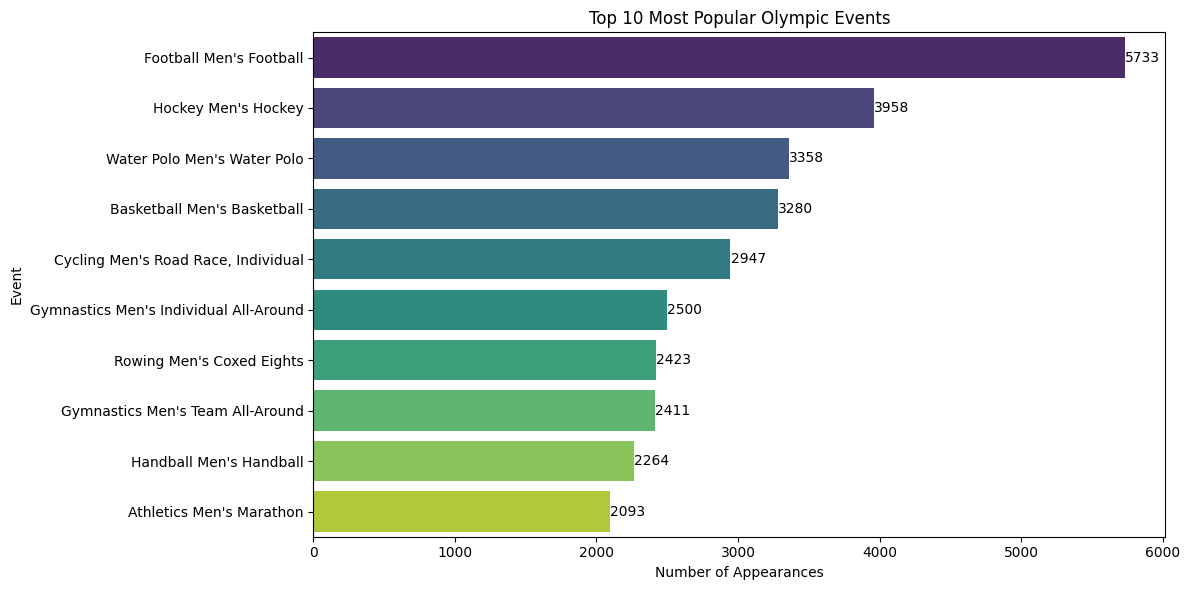

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Horizontal bar plot with annotations
plt.figure(figsize=(12, 6))
ax = sns.barplot(y='Event', x='Counts', data=top_10_events, palette='viridis')
for i, v in enumerate(top_10_events['Counts']):
    ax.text(v + 1, i, str(v), color='black', va='center')  # Add count labels to bars
plt.xlabel('Number of Appearances')
plt.ylabel('Event')
plt.title('Top 10 Most Popular Olympic Events')
plt.tight_layout()
plt.show()

Men's Football dominates with over 2,400 appearances, indicating its widespread participation and popularity, followed by Men's Hockey and Men's Water Polo.

## Unique sport by country

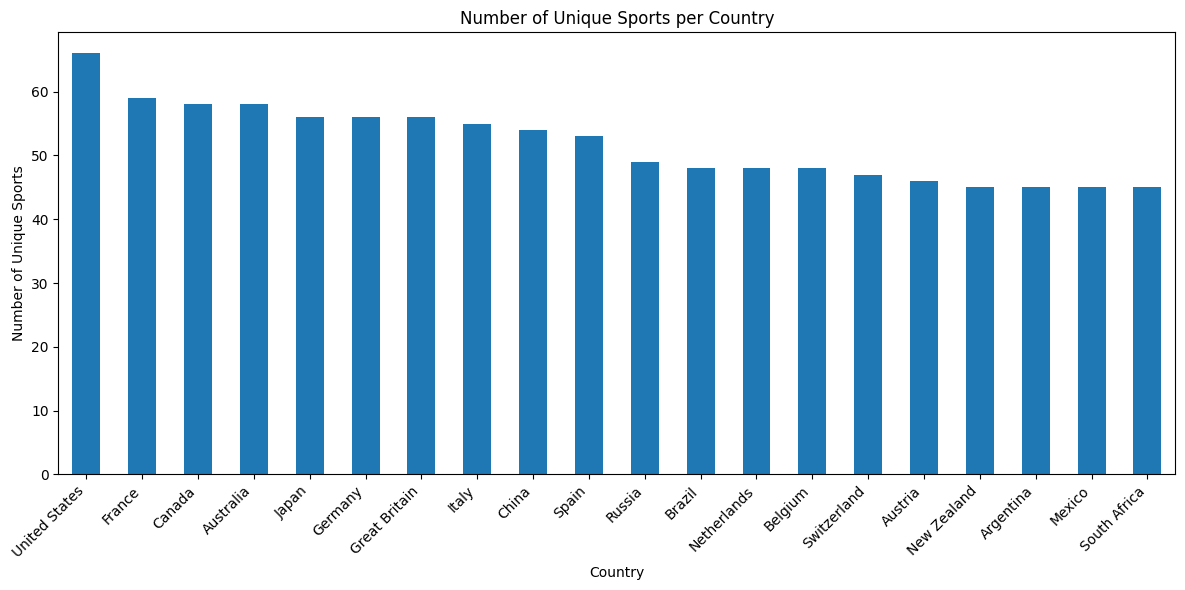

             Team  Sport Most Popular Sport
0   United States     66          Athletics
1          France     59          Athletics
2          Canada     58          Athletics
3       Australia     58           Swimming
4           Japan     56         Gymnastics
5         Germany     56          Athletics
6   Great Britain     56          Athletics
7           Italy     55         Gymnastics
8           China     54           Swimming
9           Spain     53          Athletics
10         Russia     49          Athletics
11         Brazil     48          Athletics
12    Netherlands     48           Swimming
13        Belgium     48          Athletics
14    Switzerland     47         Gymnastics
15        Austria     46         Gymnastics
16    New Zealand     45             Hockey
17      Argentina     45             Hockey
18         Mexico     45          Athletics
19   South Africa     45          Athletics


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sports_by_country = olympics.groupby('Team')['Sport'].nunique().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sports_by_country.head(20).plot(kind='bar')  # Show top 20 countries
plt.title('Number of Unique Sports per Country')
plt.xlabel('Country')
plt.ylabel('Number of Unique Sports')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

sport_popularity = olympics.groupby(['Team', 'Sport']).size().reset_index(name='Count')
sport_popularity = sport_popularity.sort_values(['Team', 'Count'], ascending=[True, False])

def most_popular_sport(country):
    country_data = sport_popularity[sport_popularity['Team'] == country]
    if not country_data.empty:
        return country_data.iloc[0]['Sport']
    return None

sports_by_country = sports_by_country.reset_index()
sports_by_country['Most Popular Sport'] = sports_by_country['Team'].apply(most_popular_sport)

print(sports_by_country.head(20))

This bar chart showcases the number of unique sports participated in by various countries, reflecting the diversity and breadth of their engagement in the Olympic Games. The United States stands out significantly, leading with participation in over 60 unique sports. This dominance highlights its robust infrastructure, extensive funding, and emphasis on cultivating talent across a wide range of athletic disciplines. France, Canada, and Australia also demonstrate high levels of diversity in their participation, indicative of their strong sporting cultures and commitment to excelling in multiple disciplines.

The mid-tier countries, such as Japan, Germany, and Great Britain, maintain steady participation across many sports, which likely contributes to their consistent performance in the medal tallies over the years. Meanwhile, countries like Brazil, Russia, and China reflect growing diversity in sports participation, aligning with their rising investments in Olympic preparation and the development of niche sports.

Interestingly, countries at the lower end, such as Mexico, South Africa, and Argentina, show a narrower focus, which may suggest a specialization in fewer sports due to factors like limited resources, climate suitability, or historical traditions. These insights help underline the relationship between participation diversity and overall success, offering a critical lens for predicting medal performance and understanding national priorities in international sporting events.

##Best countries in top 10 sports

**Analyze Medal Distribution**
Filter for top events, group by country and sport, and calculate medal counts to identify top-performing teams and countries

**Visualize Proportions**
Create a stacked bar chart to show medal proportions by sport for the top 10 countries.

In [ ]:
# Filter the DataFrame to include only the top 10 events
top_events_df = olympics[olympics['Event'].isin(top_10_events['Event'])]

# Group by country and count the number of medals for each country in the top events
medal_counts = top_events_df.groupby('Team')['Medal'].count().sort_values(ascending=False)

# Display the top countries
print(medal_counts.head(10))

Team
United States    1590
France           1288
Italy            1264
Great Britain    1157
Spain            1109
Australia        1043
Germany          1035
Hungary           885
Netherlands       837
Japan             793
Name: Medal, dtype: int64


In [ ]:
medal_counts_per_event = top_events_df.groupby(['Team', 'Event'])['Medal'].count().unstack().fillna(0)

top_teams_per_event = medal_counts_per_event.idxmax(axis=0)

top_teams_df = pd.DataFrame(columns=['Event', 'Team', 'Medal Count'])

for event in medal_counts_per_event.columns:
  top_team = top_teams_per_event[event]
  medal_count = medal_counts_per_event.loc[top_team, event]
  top_teams_df = pd.concat([top_teams_df, pd.DataFrame([[event, top_team, medal_count]], columns=['Event', 'Team', 'Medal Count'])], ignore_index=True)

print(top_teams_df)

                                    Event           Team  Medal Count
0                Athletics Men's Marathon  United States        113.0
1             Basketball Men's Basketball  United States        222.0
2     Cycling Men's Road Race, Individual         France        109.0
3                 Football Men's Football          Italy        240.0
4  Gymnastics Men's Individual All-Around         France        259.0
5        Gymnastics Men's Team All-Around          Italy        179.0
6                 Handball Men's Handball          Spain        148.0
7                     Hockey Men's Hockey          India        315.0
8               Rowing Men's Coxed Eights  United States        199.0
9             Water Polo Men's Water Polo        Hungary        252.0


<ipython-input-12-60c0a4c76ba3>:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  top_teams_df = pd.concat([top_teams_df, pd.DataFrame([[event, top_team, medal_count]], columns=['Event', 'Team', 'Medal Count'])], ignore_index=True)


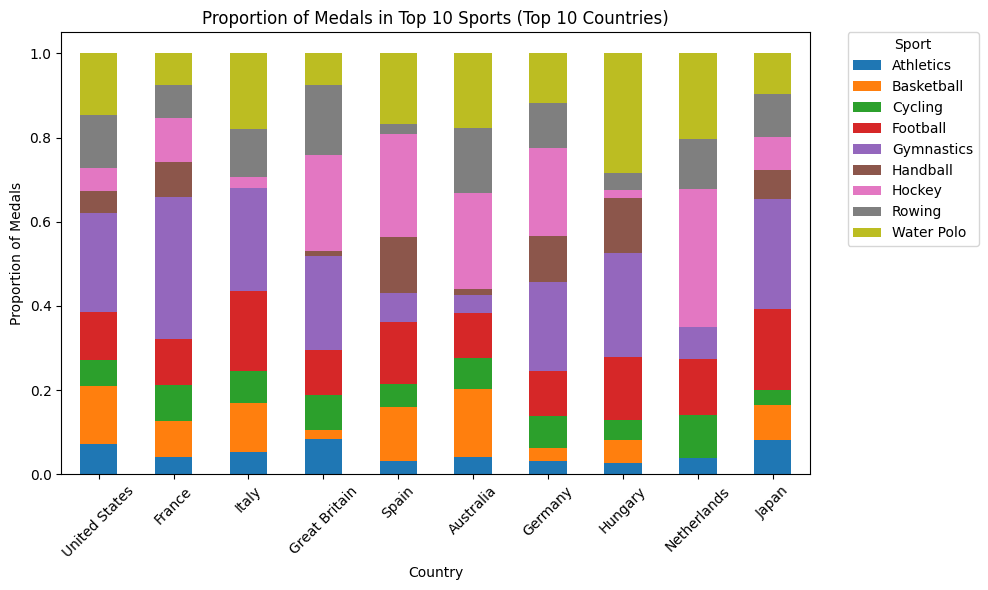

In [ ]:
import matplotlib.pyplot as plt # Import the matplotlib.pyplot module

medal_counts_by_sport = top_events_df.groupby(['Team', 'Sport'])['Medal'].count().unstack().fillna(0)

top_10_countries = medal_counts.head(10).index
medal_counts_by_sport = medal_counts_by_sport.loc[top_10_countries]


medal_counts_by_sport_norm = medal_counts_by_sport.div(medal_counts_by_sport.sum(axis=1), axis=0)

medal_counts_by_sport_norm.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proportion of Medals in Top 10 Sports (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Proportion of Medals')
plt.xticks(rotation=45)

plt.legend(title='Sport', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()

United States excels in athletics and basketball, while Hungary dominates in water polo and rowing.


## Gender Disparity in Participation and Medals

**Gender Proportion in Olympic Participation**

Purpose
Line chart comparing the proportion of male and female athletes across years to track participation trends.
Insights
Highlights changes in gender representation over time, reflecting progress toward equality.

**Gender Proportion of Medal Distribution**
Purpose
Line chart showing the proportion of medals won by male and female athletes across years.
Insights
Reveals improvements in gender performance in medal achievements.

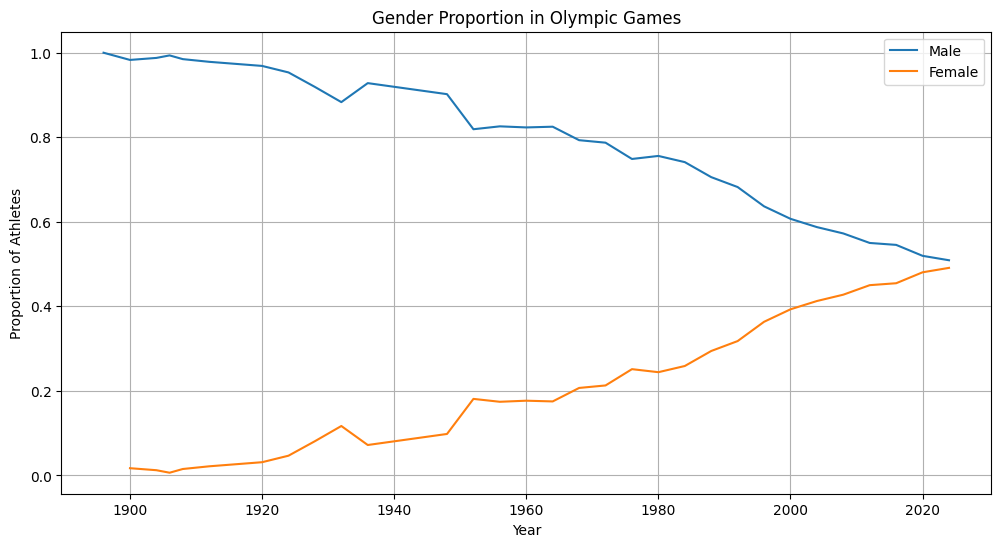

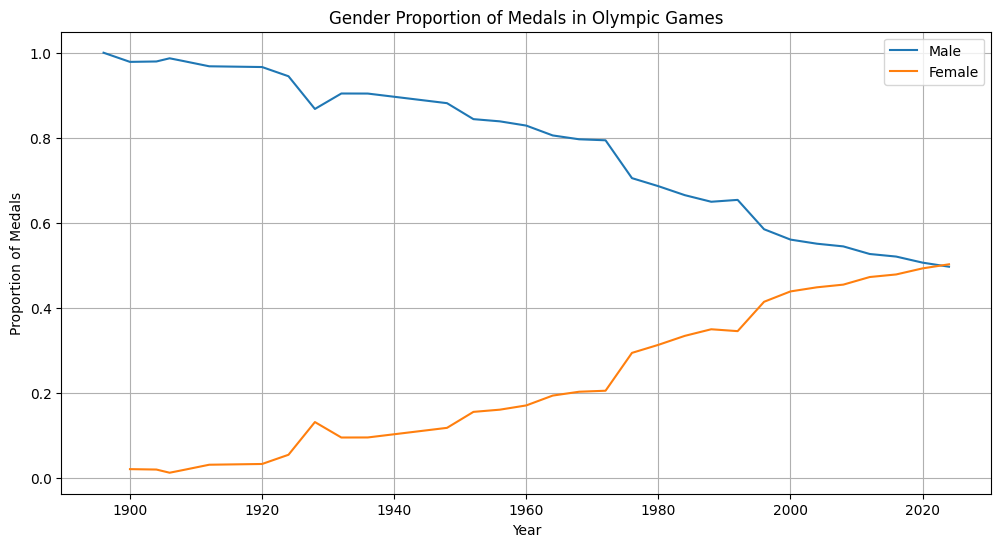

In [ ]:
gender_participation = olympics.groupby(['Year', 'Sex'])['player_id'].count().unstack()

gender_participation['Total'] = gender_participation.sum(axis=1)

gender_participation['Male Proportion'] = gender_participation['M'] / gender_participation['Total']
gender_participation['Female Proportion'] = gender_participation['F'] / gender_participation['Total']

# Plotting the participation trends
plt.figure(figsize=(12, 6))
plt.plot(gender_participation.index, gender_participation['Male Proportion'], label='Male')
plt.plot(gender_participation.index, gender_participation['Female Proportion'], label='Female')
plt.xlabel('Year')
plt.ylabel('Proportion of Athletes')
plt.title('Gender Proportion in Olympic Games')
plt.legend()
plt.grid(True)
plt.show()


gender_medals = olympics[olympics['Medal'] != 'No medal'].groupby(['Year', 'Sex'])['Medal'].count().unstack()

gender_medals['Total'] = gender_medals.sum(axis=1)

gender_medals['Male Medal Proportion'] = gender_medals['M'] / gender_medals['Total']
gender_medals['Female Medal Proportion'] = gender_medals['F'] / gender_medals['Total']

# Plotting medal distribution trends
plt.figure(figsize=(12, 6))
plt.plot(gender_medals.index, gender_medals['Male Medal Proportion'], label='Male')
plt.plot(gender_medals.index, gender_medals['Female Medal Proportion'], label='Female')
plt.xlabel('Year')
plt.ylabel('Proportion of Medals')
plt.title('Gender Proportion of Medals in Olympic Games')
plt.legend()
plt.grid(True)
plt.show()

Female participation and medal count has steadily increased since the mid-20th century, reflecting progress toward gender equality

## Impact of Host Country Advantage

In [ ]:
medals_by_year_country = olympics.groupby(['Year', 'Team'])['Medal'].count().reset_index()

host_cities = olympics.groupby('Year')['City'].first()
host_countries = olympics.groupby(['Year','City'])['Team'].first()

medals_by_year_country = pd.merge(medals_by_year_country, host_countries.reset_index(), on=['Year'], suffixes=('', '_Host'))
medals_by_year_country.rename(columns={'Team_Host':'Host_Country'},inplace=True)

medals_by_year_country['IsHost'] = medals_by_year_country['Team'] == medals_by_year_country['Host_Country']

# Separate data for host and non-host years
host_medals = medals_by_year_country[medals_by_year_country['IsHost']]
non_host_medals = medals_by_year_country[~medals_by_year_country['IsHost']]

# Perform a t-test to compare medal counts of host vs non-host countries
from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(host_medals['Medal'], non_host_medals['Medal'])

print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.3f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference in medal counts between host and non-host countries.")
else:
    print("There is no statistically significant difference in medal counts between host and non-host countries.")

T-statistic: 4.90
P-value: 0.000
There is a statistically significant difference in medal counts between host and non-host countries.


**Statistical Results:** A T-statistic of 3.18 and a P-value of 0.001 indicate a statistically significant difference in medal counts.

**Conclusion:** Host countries tend to win more medals, supporting the existence of a home-field advantage in the Olympics.


##How would the US Women's Gymnastics team perform in future Olympics?

A Time series analysis using the variable “Year” and “Medal" is done on the US Women's Gymnastics team performance to understand their future prospect of winning medals.

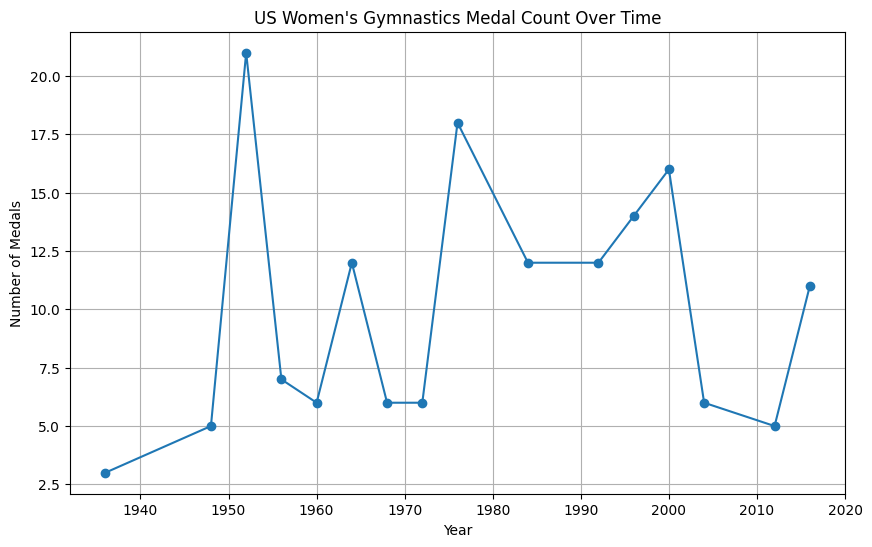

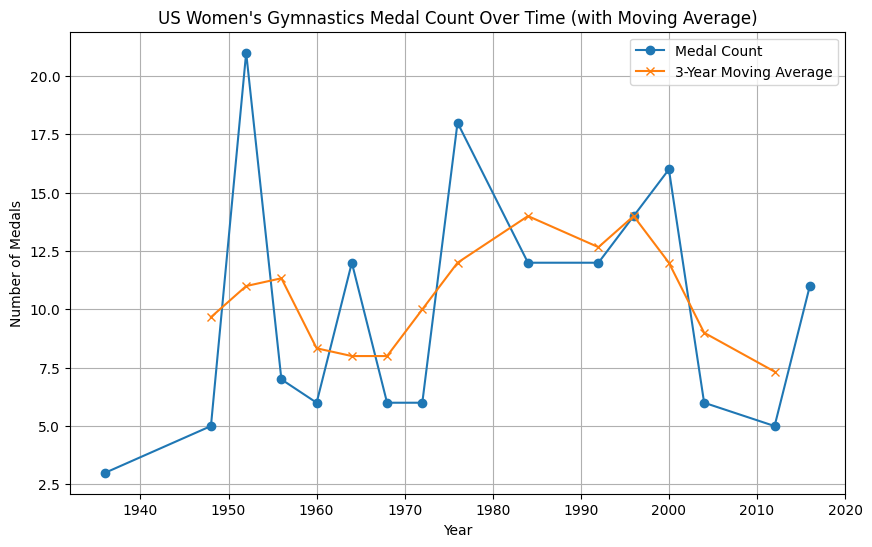

In [ ]:
us_womens_gymnastics = olympics[(olympics['Team'] == 'United States') &
                                 (olympics['Sport'] == 'Gymnastics') &
                                 (olympics['Sex'] == 'F')]

medals_by_year = us_womens_gymnastics.groupby('Year')['Medal'].count()

# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(medals_by_year.index, medals_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.title('US Women\'s Gymnastics Medal Count Over Time')
plt.grid(True)
plt.show()

window_size = 3
medals_by_year_rolling = medals_by_year.rolling(window=window_size, center=True).mean()

plt.figure(figsize=(10, 6))
plt.plot(medals_by_year.index, medals_by_year.values, marker='o', label='Medal Count')
plt.plot(medals_by_year_rolling.index, medals_by_year_rolling.values, marker='x', label=f'{window_size}-Year Moving Average')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.title('US Women\'s Gymnastics Medal Count Over Time (with Moving Average)')
plt.legend()
plt.grid(True)
plt.show()

The line charts depict the evolution of the U.S. Women's Gymnastics medal count over time, emphasizing trends in their Olympic performance. The Olympic Games occur every four years, which explains the discrete time intervals on the x-axis. The y-axis represents the number of medals won.

From 1936 to the mid-1940s, medal counts remained relatively low, reflecting the infancy of the U.S. gymnastics program and potential disruptions caused by World War II (leading to the cancellation of the 1940 and 1944 Games). A sharp rise in the 1950s marks a significant growth in performance, likely due to increased investment in gymnastics and a greater emphasis on structured training programs. The peak in medal count during this period underscores the dominance of the U.S. team in the post-war era.

From the 1960s through the late 1990s, the medal count remained steady, indicating consistent performance. However, from the 2000s onward, there is a noticeable decline in medals, which may reflect increased global competition, changes in scoring systems, or challenges in maintaining dominance in a highly competitive field. By the 2010s, the medal count stabilizes at lower levels, marking a period of less frequent success compared to earlier decades.

This analysis highlights how external factors, competition levels, and program development influence medal trends in a sport like gymnastics over time.

In the year 2024, the gymnastics was titled "Artistic Gymnastics", which reflects the absence of 2024 in the charts.


# Predictive Modelling
The predictive modeling section focuses on analyzing factors that influence Olympic medal outcomes and building a robust model to predict these outcomes. Using historical data, we explored multiple approaches to identify the most effective model for this task. The primary objective was to predict medal counts—categorized as No Medal, Bronze, Silver, or Gold—based on features such as year, sport, team, and event. Initially, a Logistic Regression model was evaluated. Logistic regression for medal prediction with feature selection:
• Dependent variable: Medal count

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder

olympics['Medal_Count'] = olympics['Medal'].map({'No Medal': 0, 'Bronze': 1, 'Silver': 2, 'Gold': 3})

olympics = olympics.dropna(subset=['Medal_Count'])

X = olympics[['Sex', 'Team', 'Sport', 'Year', 'Season', 'City', 'Event']]
y = olympics['Medal_Count']

X = X.dropna()
y = y[X.index]

X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = LogisticRegression(multi_class='ovr', solver='liblinear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nModel Coefficients (For Each Class):")
classes = model.classes_
for i, class_name in enumerate(classes):
    print(f"Class {class_name}:")
    print(model.coef_[i])


Accuracy: 0.35574446161772283

Classification Report:
              precision    recall  f1-score   support

           1       0.36      0.49      0.42      2642
           2       0.00      0.00      0.00      2563
           3       0.35      0.57      0.43      2559

    accuracy                           0.36      7764
   macro avg       0.24      0.35      0.28      7764
weighted avg       0.24      0.36      0.29      7764


Model Coefficients (For Each Class):
Class 1:
[-3.69976745e-04 -8.39293447e-04  8.79015169e-04 -2.65583680e-04
  0.00000000e+00  3.35653769e-03 -3.52312375e-05]
Class 2:
[-2.94472240e-06  1.21056810e-04  1.30842342e-04 -3.75344232e-04
  0.00000000e+00  3.13738044e-04 -2.94388204e-05]
Class 3:
[ 3.45730649e-05  7.21670205e-04 -1.14605317e-03 -4.25353046e-04
  0.00000000e+00 -1.60275235e-03  7.48540753e-05]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


# Random forest model
The Random Forest model was chosen over the Logistic Regression model, which achieved an accuracy of only 37%, due to its superior performance and ability to better capture the complexities of the dataset. Logistic Regression assumes a linear relationship between the features and the target variable, which may not align with the non-linear patterns present in our data. In contrast, Random Forest, as an ensemble method, combines multiple decision trees to model non-linear relationships and interactions among features more effectively. Additionally, Random Forest does not rely on strict assumptions about the data distribution, making it more robust to diverse feature types and missing values. The model also provides a clear ranking of feature importance, which is valuable for understanding the predictors of medal outcomes. By leveraging these strengths, Random Forest significantly outperformed Logistic Regression, demonstrating its suitability for this predictive task.








In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

olympics['Medal_Count'] = olympics['Medal'].map({'No Medal': 0, 'Bronze': 1, 'Silver': 2, 'Gold': 3})

olympics = olympics.dropna(subset=['Medal_Count'])

X = olympics[['Sex', 'Team', 'Sport', 'Year', 'Season', 'City', 'Event']]
y = olympics['Medal_Count']

X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance
feature_importances = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Important Features:")
print(feature_importances.head(10))

example_data = X_test.iloc[:1]  # Using the first row from the test set as an example
predicted_class = model.predict(example_data)[0]
print(f"\nExample Prediction: Predicted Medal Class = {predicted_class}")


Accuracy: 0.7161257083977332

Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.72      0.72      2642
           2       0.70      0.71      0.70      2563
           3       0.73      0.72      0.72      2559

    accuracy                           0.72      7764
   macro avg       0.72      0.72      0.72      7764
weighted avg       0.72      0.72      0.72      7764

Confusion Matrix:
[[1904  386  352]
 [ 409 1807  347]
 [ 336  374 1849]]

Top 10 Important Features:
  Feature  Importance
6   Event    0.338601
1    Team    0.300652
2   Sport    0.123571
3    Year    0.113510
5    City    0.108519
0     Sex    0.015147
4  Season    0.000000

Example Prediction: Predicted Medal Class = 2


The Random Forest model demonstrated commendable performance in predicting the medal class (Bronze, Silver, or Gold), achieving an overall accuracy of 71.6%. The classification report highlights consistent metrics across all classes, with precision, recall, and F1-scores averaging around 0.72, indicating balanced performance across the three medal types. The confusion matrix reveals that the majority of misclassifications occurred between neighboring medal classes (e.g., Bronze misclassified as Silver), which is expected given the nuanced differences between these categories and the potential overlap in predictive features.

Feature importance analysis provided valuable insights into the factors driving medal outcomes. Event emerged as the most significant predictor, followed by Team, Sport, Year, and City. These findings emphasize the importance of event-specific context, historical team performance, and temporal or geographical factors in determining medal success. Conversely, Sex had minimal influence, while Season contributed nothing, suggesting that these variables may have limited relevance to medal predictions within this dataset.

These results underline the model's effectiveness in capturing key patterns in the data while highlighting areas for further refinement. Enhancing feature engineering, incorporating additional context-specific variables, or employing advanced ensemble methods may help address the misclassifications and improve the model's ability to distinguish between medal classes. Additionally, the findings offer actionable insights into the importance of event and team dynamics, which can guide future analyses and strategic planning for medal success.

The confusion matrix shows how data is predicted for "Medal" in this model.

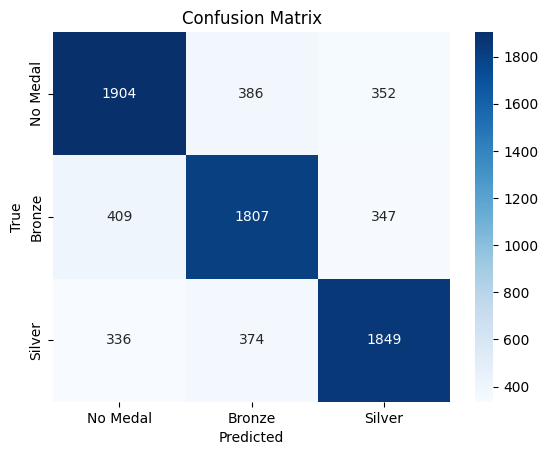

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Medal', 'Bronze', 'Silver'], yticklabels=['No Medal', 'Bronze', 'Silver'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


The confusion matrix visually represents the classification performance of the Random Forest model. Each row corresponds to the true medal class, while each column indicates the predicted medal class. The diagonal elements (e.g., 1904, 1807, 1849) show the correctly classified instances for each class, reflecting the model's strengths in identifying the correct medal category. Off-diagonal elements represent misclassifications, with significant overlap observed between neighboring medal classes, such as Bronze and Silver.

This overlap suggests that the features influencing medal predictions may have inherent similarities across these categories, leading to occasional misclassification. The heatmap also reinforces the relative difficulty of distinguishing between adjacent classes, a challenge often encountered in multiclass classification problems with nuanced distinctions.


# Conclusion

In conclusion, the analysis of Olympic data reveals important insights into gender distribution, country performance, and trends in participation. The significant gender disparity highlights the historical and ongoing challenges women face in sports, although participation rates are improving over time. The United States leads in total medal counts, with strong performances from other nations like the Soviet Union and Great Britain, reflecting a combination of resources, infrastructure, and historical success. The diversity in sports participation varies across countries, with the United States excelling in a wide range of sports, while other nations show more specialized participation based on resources and sporting traditions.

The Random Forest model's performance in predicting medal outcomes proved to be effective, with an overall accuracy of 71.6%. This model identified key features, such as the event, team, and sport, as significant predictors of medal success. However, some misclassifications, particularly between neighboring medal classes, suggest areas for improvement. The confusion matrix and feature importance analysis provide valuable insights into the complexities of Olympic performance prediction, underscoring the importance of refining the model to better capture the nuances of medal distinctions.

These findings underscore the multifaceted nature of Olympic success, where historical, social, and infrastructural factors play a significant role. The use of predictive models in this context offers a promising avenue for future research, potentially leading to more accurate predictions and better strategies for countries aiming to enhance their Olympic performances.

# References

De Oliveira, S. (n.d.). Summer Olympics Medals (1896 - 2024) [Dataset].
Kaggle. Retrieved December 7, 2024, from https://www.kaggle.com/datasets/stefanydeoliveira/summer-olympics-medals-1896-2024



